In [1]:
'''
TP2 ALC
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# leemos los .csv

train = pd.read_csv('mnist_train.csv',names=np.linspace(0,784,785))
test = pd.read_csv('mnist_test.csv',names=np.linspace(0,784,785))


## Ejercicio 1

 
### (a) Realizar una funcion en python que dado los datos de las imagenes de entrenamiento y una fila, grafique la imagen guardada en esa fila y en el tıtulo del grafico se indique a que numero corresponde, es decir su clasificacion. Usar la funcion imshow() de pyplot.


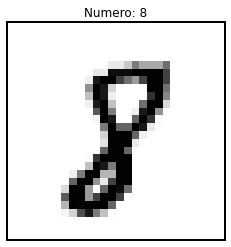

In [9]:
def configuraciones_diseño():
    """
    Seteo de configuraciones de los bordes de un plot
    """
    plt.box(on=True)
    ax = plt.gca()
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    #Ocultar numero de pixeles en eje X e Y
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])


def graficar(df,fila,pred = None):
    """
    Grafica una imagen de un df por indice dado por fila, pred es del tipo string. Indica la prediccion en el grafico.
    """
    plt.imshow(np.array(df.iloc[fila,1:]).reshape(28,28),cmap='Greys')
    numero = df.iloc[fila,0]
    plt.title(f'Numero: {numero}')
    if pred :
        plt.figtext(0.5, 0.01, f'prediccion: {pred}', ha='center', fontsize=14)
    #plt.axis('off')
    configuraciones_diseño()
    plt.show()

#prueNumero: ',test.iloc[indices_imagenes_no_acertadas[r],0]ba:
    
fila = np.random.randint(0, len(train)) #Elegimos una imagen al azar
graficar(train,fila)

### (b) ¿Cuantas imagenes hay por cada dıgito en el conjunto de entrenamiento? ¿Y en el conjunto de testeo?

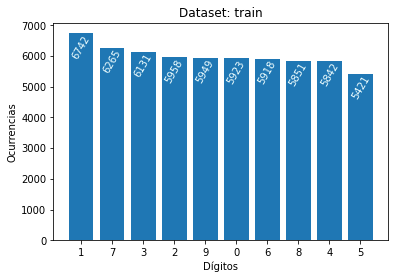

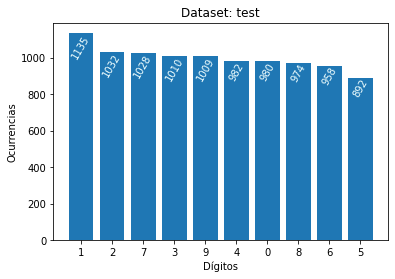

In [20]:
def distribuciones_con_porcentajes(df,nombre_df):
    # Calcular las ocurrencias de cada dígito
    ocurrencias = df[df.columns[0]].value_counts()
    # Calcular el total de ocurrencias
    total_ocurrencias = ocurrencias.sum()
    # Calcular los porcentajes de ocurrencia
    porcentajes = (ocurrencias / total_ocurrencias) * 100
    # Crear la figura y el eje del gráfico
    fig, ax = plt.subplots()
    digitos = [str(d) for d in ocurrencias.index]
    plt.bar(digitos,ocurrencias.values)
    #Agregar etiquetas de texto en cada barra
    for i in range(len(ocurrencias)):
        ax.text(i , ocurrencias.values[i],
                f"{porcentajes[i]:.2f}%",
                ha='center',
                va='top',
                rotation=60,
                c="azure")
    # Configurar etiquetas y título del gráfico
    ax.set_xlabel('Dígitos')
    ax.set_ylabel('Ocurrencias')
    ax.set_title('Dataset: '+nombre_df)
    plt.show()

def distribuciones_con_cantidades(df,nombre_df):
    # Calcular las ocurrencias de cada dígito
    ocurrencias = df[df.columns[0]].value_counts()
    # Crear la figura y el eje del gráfico
    fig, ax = plt.subplots()
    digitos = [str(d) for d in ocurrencias.index]
    plt.bar(digitos,ocurrencias.values)
    #Agregar etiquetas de texto en cada barra
    for i in range(len(ocurrencias)):
        ax.text(i , ocurrencias.values[i],
                f"{ocurrencias.values[i]:.0f}",
                ha='center',
                va='top',
                rotation=60,
                c="azure")
    # Configurar etiquetas y título del gráfico
    ax.set_xlabel('Dígitos')
    ax.set_ylabel('Ocurrencias')
    ax.set_title('Dataset: '+nombre_df)
    plt.show()

distribuciones_con_cantidades(train,"train")
distribuciones_con_cantidades(test,"test")

### (c) Para las primeras 2.000 imagenes del conjunto de entrenamiento realizar una funcion en python que devuelva la imagen promedio de cada uno de los dıgitos.

In [22]:
imagenes_prom = []   #guardaremos las imagenes en un array para luego graficarlas

def imagen_promedio(df,cantidad):
    for n in range(0,10):
        df_n = df[df[0] == n].iloc[:2000,1:]    #creamos df unicamente con las imagenes del numero n
        imagenes_n = df_n.to_numpy()    #convertimos el df en un array bidimensional de numpy
        imagen_promedio = np.mean(imagenes_n,axis=0)  # .mean() calcula el promedio de todas las imagenes que se encuentran como filas de la matriz 'imagenes_n'
        imagenes_prom.append(imagen_promedio)
        globals()['imagen_'+str(n)] = imagen_promedio   # asignamos la imagen promedio de cada numero 'n' a una variable llamada 'imagen_n' 

imagen_promedio(train,2000)



### (d) Graficar cada una de las imagenes promedio obtenidas.

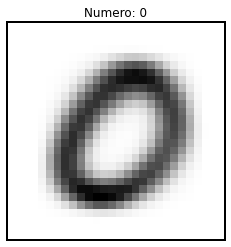

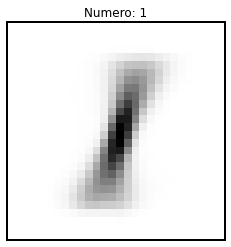

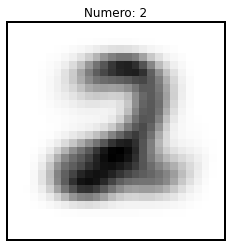

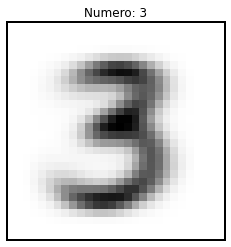

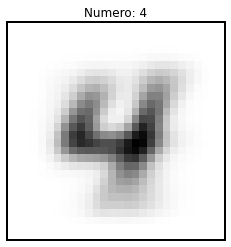

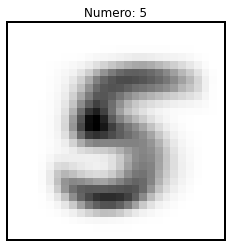

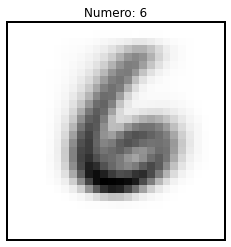

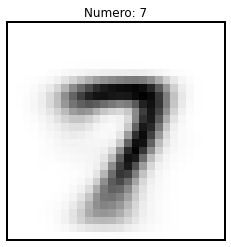

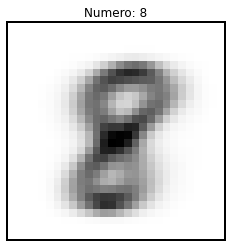

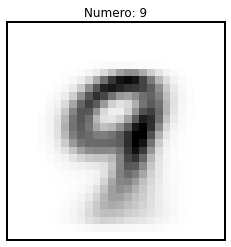

In [24]:
      
def graficar_imagenes():
    for idx,imagen in enumerate(imagenes_prom):
        plt.title(f'Numero: {idx}')
        plt.imshow(imagen.reshape(28,28),cmap='Greys')
        #plt.axis('off')
        configuraciones_diseño()
        plt.show()
        
graficar_imagenes()

# Ejercicio 2

### (a) Realizar una funcion en python que dadas las imagenes promedio del ejercicio 1(c), calcule la menor distancia Euclıdea entre todos los dıgitos y cada una de las primeras 200 imagenes de testeo. La funcion debe devolver un arreglo con las 200 predicciones.

In [29]:
def distancia(img1,img2):
    return np.linalg.norm(img1-img2)

# la funcion prediccion() toma la lista de promedios de las imagenes del 0 al 9, y una imagen a testear 
# la array a testear debe tener en la posicion [0] el numero de la imagen: tamaño de 785
# devolvera un float

def prediccion(imagenes_prom,imagen_test):
    distancias = []
    #Calculamos todas las distancias y tomamos la minima
    for imagen in imagenes_prom:
        dist = distancia(imagen,imagen_test)
        distancias.append(dist)
    pred = np.argmin(distancias) #Recorremos las 10 distancias(Una por cada imagen promedio), nos quedamos el indice de la minima que coincide con el digito comparado
    return pred
         

# la funcion prediccion_200() toma un df (test) y la lista de promedios de las imagenes
# devolvera una lista de 200 predicciones, de las primeras 200 imagenes del dataframe

def predecir_k_imgs(df_test,imagenes_prom,cantidad_k):
    df = df_test.iloc[:cantidad_k,df_test.columns[1:]].values
    predicciones = []
    for i in range(len(df)):
        pred_i = prediccion(imagenes_prom,df[i])
        predicciones.append(pred_i)
    return predicciones


### (b) Realizar una funcion en python que tome el arreglo de predicciones anteriores y evalue si es correcta o no la prediccion. Debe devolver la precision en la prediccion. Se define la precision como:  precision = Σ(Casos acierto) / Σ(Casos totales)

In [104]:
def precision(df_test, imagenes_p,k):
    predicciones = predecir_k_imgs(df_test,imagenes_p,k)
    y_test = df_test.iloc[:k,0].values #.values para pasar a array numpy
    acerto_o_no = predicciones == y_test
    aciertos = sum(acerto_o_no)
    #Guardamos los indices de imagenes acertadas
    return aciertos/200,acerto_o_no

calcular_precision = precision(test,imagenes_prom,200)
print("Precision: ", calcular_precision[0],"%")

Precision:  0.83 %


Numero:  7
Indice:  70
Distancia al 7 (valor real): 1572.29
Distancia al 7 (prediccion): 1572.29


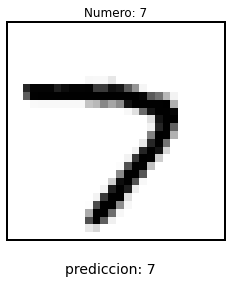

In [109]:
def graficar_num_no_acertado(df,imagenes_p,cantidad):
    calcular_precision = precision(df,imagenes_prom,cantidad)
    imgs_no_acertadas = [idx for idx, e in enumerate(calcular_precision[1]) if e]
    #indices_imagenes_no_acertadas = imagenes_no_acertadas(test,imagenes_prom,cantidad)
    #generamos numero random para graficar alguna de las imagenes no acertadas
    r = np.random.randint(0,len(imgs_no_acertadas))

    # printeos extras
    numero = test.iloc[imgs_no_acertadas[r],0]
    indice = imgs_no_acertadas[r]
    predic = prediccion(imagenes_prom,np.array(test.iloc[imgs_no_acertadas[r],1:]))
    print('Numero: ',numero)
    print('Indice: ',indice)
    print(f'Distancia al {numero} (valor real): {distancia(imagenes_prom[numero],np.array(test.iloc[indice,1:])):.2f}')
    print(f'Distancia al {predic} (prediccion): {distancia(imagenes_prom[predic],np.array(test.iloc[indice,1:])):.2f}')
    graficar(test,imgs_no_acertadas[r],predic) 

graficar_num_no_acertado(test,imagenes_prom,200)

**Comentarios**:

Si bien la precision es buena, aun queda un gran margen de mejora. Se podria decir que la distancia euclidea funciona bastante bien pero se puede seguir mejorando a traves de estrategias como por ejemplo normalizacion o seleccion de caracteristicas relevantes.

### (c) Graficar un par de casos de imagenes de testeo en los cuales no se haya acertado. ¿Considera buena la precision?

Numero:  3
Indice:  195
Distancia al 3 (valor real): 1852.60
Distancia al 5 (prediccion): 1705.36


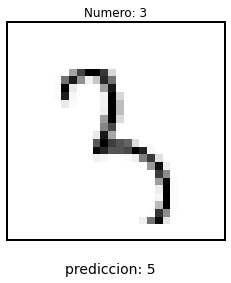

In [86]:

def imagenes_no_acertadas(df,imagenes,cantidad):
    df = df.iloc[:cantidad,:]
    predicciones = np.array(predecir_k_imgs(df,imagenes,cantidad))    # array de las 200 predicciones
    valores_posta = np.array(df.iloc[:,0])  # array de los valores reales de cada imagen
    no_acertadas = pd.DataFrame(predicciones == valores_posta)     
    indices_imagenes_no_acertadas = no_acertadas[no_acertadas[0] == False].index
    return indices_imagenes_no_acertadas


def graficar_num_no_acertado(cantidad):
    indices_imagenes_no_acertadas = imagenes_no_acertadas(test,imagenes_prom,cantidad)
    #generamos numero random para graficar alguna de las imagenes no acertadas
    r = np.random.randint(0,len(indices_imagenes_no_acertadas))

    # printeos extras
    numero = test.iloc[indices_imagenes_no_acertadas[r],0]
    indice = indices_imagenes_no_acertadas[r]
    predic = prediccion(imagenes_prom,np.array(test.iloc[indices_imagenes_no_acertadas[r],1:]))
    print('Numero: ',numero)
    print('Indice: ',indice)
    print(f'Distancia al {numero} (valor real): {distancia(imagenes_prom[numero],np.array(test.iloc[indice,1:])):.2f}')
    print(f'Distancia al {predic} (prediccion): {distancia(imagenes_prom[predic],np.array(test.iloc[indice,1:])):.2f}')
    graficar(test,indices_imagenes_no_acertadas[r],predic) 
    

graficar_num_no_acertado(200)

# Ejercicio 3



### Implemetar una funcion en Python que dada una matriz A halle la descomposicion SVD de A, por el metodo de la potencia. Llamamos descomposicion SVD en valores singulares a: $$A = U ΣV T $$ 


In [124]:
def metodo_potencia(A,x0,e):
    x_i = x0
    x_j=A@x0
    x_j = x_j / np.linalg.norm(x_j)
    
    error = np.dot(x_i,x_j)
    while error < (1-e):
        x_i = x_j
        x_j = A@x_j
        x_j = x_j / np.linalg.norm(x_j)
        error = np.dot(x_i,x_j)
    return x_j

def minima_dim(A):
    return min(len(A[0]),len(A))

def svd(A):
    
    # sea NxN la dimension de A, generamos vector x0 de dimension N
    x0 = np.random.random(len(A[0]))
    x0 = x0 / np.linalg.norm(x0)    #normalizamos x0

    # declaramos las matrices de la descomposicion:
    U = []
    S = []
    V = []

    # Sea MxN la dimension de A, nececito el minimo entre M y N para saber la cantidad
    # de iteraciones, ya que ese minimo me determina ya sea la cantidad de columnas de U o de V
    # que puedo hallar con esta funcion iterativa
    m = minima_dim(A)
    e = 0.000001
    for i in range(1,m+1):
        # generamos B = At*A
        B = np.dot(np.transpose(A),A)

        # obtenemos cada u_i, v_i, y s_i(valor singular) aplicando la formula dada en el trabajo
        v_i = metodo_potencia(B,x0,e)
        s_i = np.linalg.norm(np.dot(A,v_i))
        u_i = np.dot(A,v_i) / s_i

        # armamos el vector de m ceros con el valor singular actual en posicion i-1
        s = np.zeros(m)
        s[i-1] = s_i
         
        U.append(u_i)   # agrego los u_i como filas, cuando termine de iterar transpongo y obtengo U con u_i como columnas
        S.append(s)
        V.append(v_i)   # agrego v_i como filas, osea que la V que devuelve la funcion ya es V transpuesta

        # actualizamos A restandole s * u_i * v_i
        # se hace un reshape de los vectores para poder hacer la multiplicacion de un vector Mx1 * 1xN, y que devuelva una matriz MxN
        A = A - np.dot((s_i*u_i).reshape(len(u_i),1),v_i.reshape(1,len(v_i)))
    
    U = np.transpose(U)
    S = np.array(S)
    V = np.array(V)

    return U,S,V



# Ejercicio 4

### (a) Tomar las primeras 2.000 imágenes del conjunto de imágenes de entrenamiento y ordenarlas según el dígito al que corresponde de 0 a 9. Obtener 10 matrices correspondientes a cada dígito. Estas matrices deben tener una dimensión de 785 × cantidad de imágenes, puede no haberla misma cantidad de imágenes para cada dígito en las primeras 2.000 imágenes. Recordar que la primer columna es la clasificación. 
### Finalmente obtener $ M_{i}=0,...,9$ matrices de 784 × cantidad imágenes quitando la primer columna. Se pueden guardar las matrices en un arreglo de tipo lista donde cada item de la lista se corresponde con una matriz $M_{i}$ y la posición hace referencia al dígito que representan.

In [125]:
train_2000 = train.iloc[:2000,:]

matrices_M_i = []

for n in range(0,10):
    #obtengo matrices para cada numero
    matriz_n = train_2000[train_2000[0] == n].iloc[:,1:]  # se le saca la primer columna
    matrices_M_i.append(np.transpose(np.array(matriz_n)))

### (b) Realizar la descomposición SVD de cada una de las matrices $M_{i}$ utilizando la función creada en el ejercicio (3). Para ello realizar una función en Python que tome la lista de matrices $M_{i}$ y devuelva en 3 listas la solución de la descomposición, es decir $U_{i},\Sigma$ y $V_{i}$.


In [126]:
def svd_Mi(matrices_M_i):
    Ui = []
    Si = []
    Vi = []
    for i,matriz in enumerate(matrices_M_i):
        u_i,s_i,v_i = svd(matriz)     # cada matriz en la lista es un DF, lo pasamos a np.array
        Ui.append(u_i)
        Si.append(s_i)
        Vi.append(v_i)
        print("Calculando sobre M_i, i=",i)
    return Ui,Si,Vi


### (c) Las columnas de $U_{i}$ son combinación lineal del espacio columna de $M_{i}$. Teniendo esto presente tomar la primer columna de cada $U_{i}$ y graficarla como imagen, es decir convertir a una matriz de 28 × 28 y graficar. Explique qué representa.

In [127]:
Ui,Si,Vi = svd_Mi(matrices_M_i)

Calculando sobre M_i, i= 0
Calculando sobre M_i, i= 1
Calculando sobre M_i, i= 2
Calculando sobre M_i, i= 3
Calculando sobre M_i, i= 4
Calculando sobre M_i, i= 5
Calculando sobre M_i, i= 6
Calculando sobre M_i, i= 7
Calculando sobre M_i, i= 8
Calculando sobre M_i, i= 9


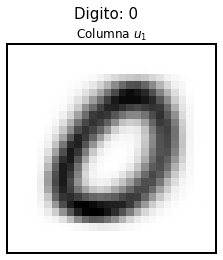

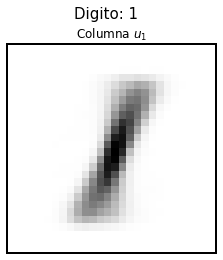

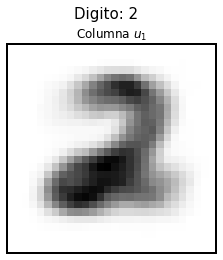

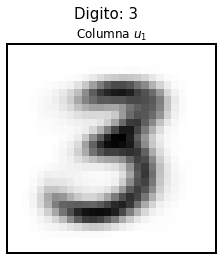

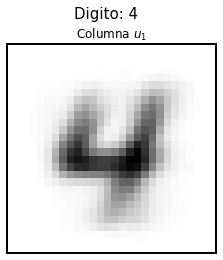

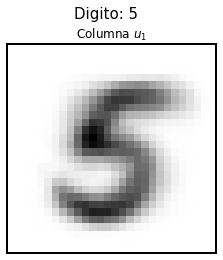

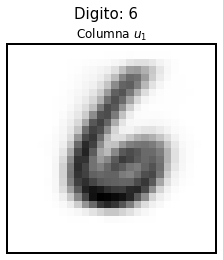

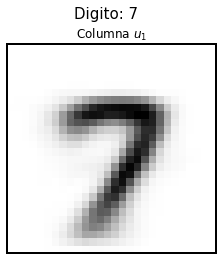

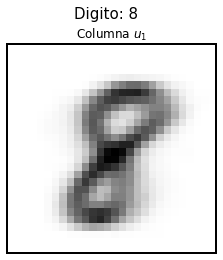

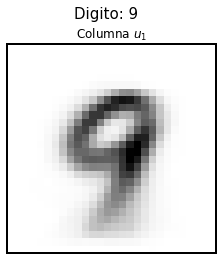

In [128]:
def graficar_u1(Ui):
    for digito,ui in enumerate(Ui):
        plt.imshow(np.transpose(ui)[0].reshape((28,28)),cmap='Greys')
        plt.title(r'Columna $u_1$')
        configuraciones_diseño()
        plt.subplots_adjust(top=0.85)
        plt.suptitle(f"Digito: {digito}", fontsize=15)
        plt.show()
        
graficar_u1(Ui)

**Comentarios**:

Al graficar la primer columna de la matriz U de la descomposicion para cada digito, se puede ver el promedio o la tendencia principal de cada uno. Esto es porque la primer columna de U esta asociada al valor singular mas grande, el cual contiene la informacion principal o patrones cominantes.

### (d) Repetir el ítem anterior pero para las columnas 2 y 3 de cada una de las $U_{i}$. Comparar con lo obtenido en (c) y explicar las diferencias.

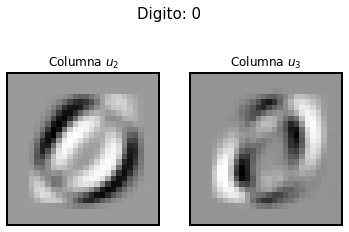

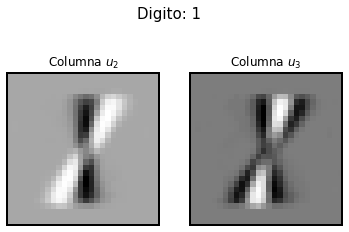

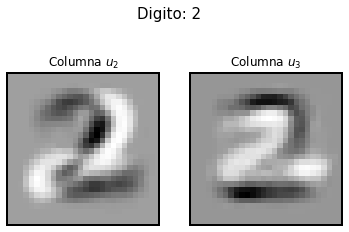

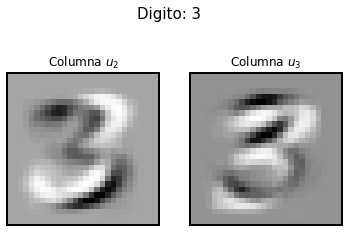

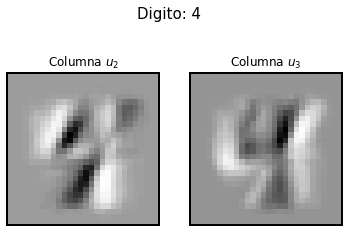

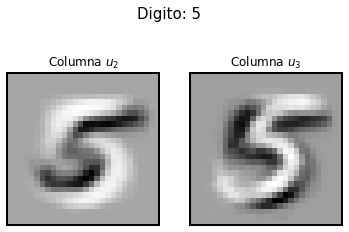

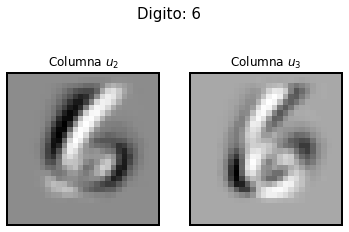

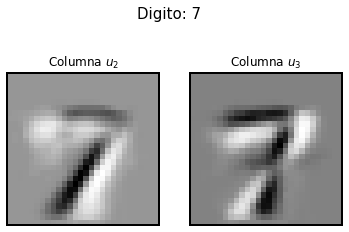

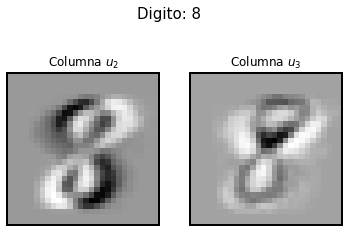

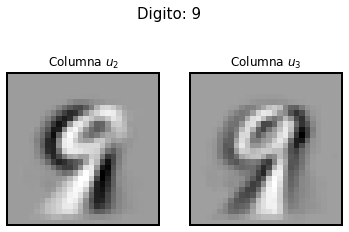

In [129]:
def graficar_u2_u3(Ui):
    for digito,ui in enumerate(Ui):
        plt.subplot(1,2,1)
        plt.imshow(np.transpose(ui)[1].reshape((28,28)),cmap='Greys')
        plt.title(r'Columna $u_2$')
        configuraciones_diseño()
        plt.subplot(1,2,2)
        plt.imshow(np.transpose(ui)[2].reshape((28,28)),cmap='Greys')
        plt.title(r'Columna $u_3$')
        configuraciones_diseño()
        plt.subplots_adjust(top=0.85,hspace=0.4)
        plt.suptitle(f"Digito: {digito}", fontsize=15)
        plt.show()

graficar_u2_u3(Ui)

**Comentarios**:

Se pueden ver los digitos "dobles", uno blanco y otro negro. Esto podria representar una variación o diferenciación en las características de las imágenes. Al ser las columnas 2 y 3 de la matriz U, aun siguen asociados a autovalores con buen peso sobre la informacion de cada digito, por lo que es facil distinguir de que digito se trata al ver las imagenes.

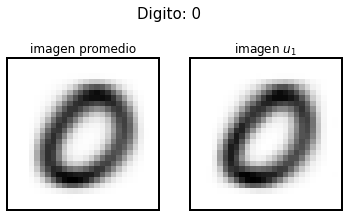

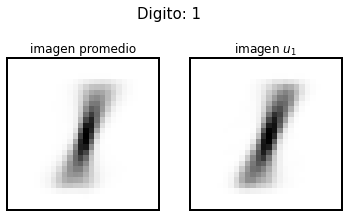

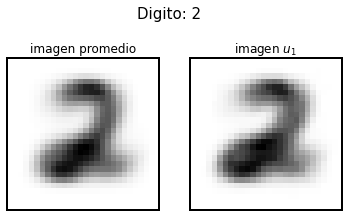

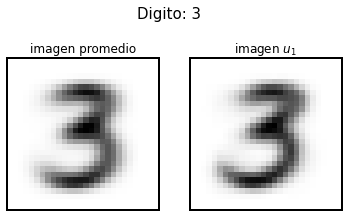

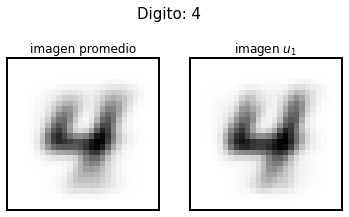

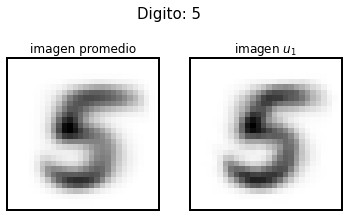

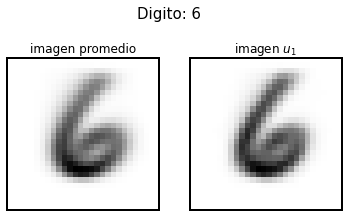

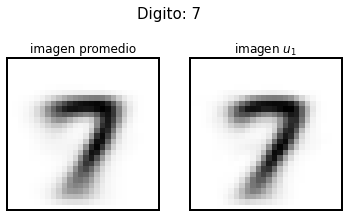

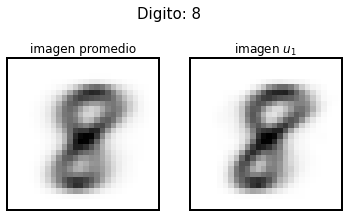

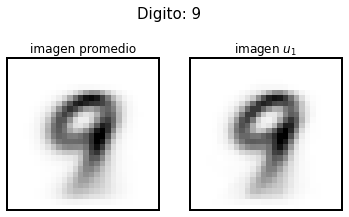

In [131]:
def comparar_promedio_svd(Ui,imagenes_prom):
    for i in range(0,10):
        imagen_promedio = imagenes_prom[i].reshape((28,28))
        imagen_u1 = np.transpose(Ui[i])[0].reshape((28,28))
        plt.subplot(1,2,1)
        plt.imshow(imagen_promedio,cmap='Greys')
        plt.title('imagen promedio')
        configuraciones_diseño()
        plt.subplot(1,2,2)
        plt.imshow(imagen_u1,cmap='Greys')
        plt.title(r'imagen $u_1$')
        configuraciones_diseño()
        plt.subplots_adjust(top=0.95,hspace=0.4)
        plt.suptitle(f"Digito: {i}", fontsize=15)
        plt.show()
        
comparar_promedio_svd(Ui,imagenes_prom)

**Comentarios**:

Como se esperaba, la primer columna de U contiene una informacion muy similar al promedio de cada digito.

### (e) El teorema de la descomposición en valores singulares nos asegura que dada una matriz $A \in \mathbb{R}^{mxn}$con rango$r$, y $\sigma_1,\dots,\sigma_r $  los valores singulares de $A$, con  $u_1,\dots,u_r $ y $v_1,\dots,v_r $ las primeras $r$ columnas de las matrices $U$ y $V$ respectivamente, y sea $k \leq r$, se tiene que:$$A = U \Sigma V = \sum_{j=1}^{r} \sigma_j u_j v_j^{t}$$Y la matriz de rango $k$ que mejor aproxima a la matriz $A$ en norma 2 es:$$A_k = \sum_{j=1}^{k}\sigma_j u_j v_j^{t}$$Utilizaremos este resultado para encontrar distintas aproximaciones de $U_{i}$, que nos permitirá componer el espacio imagen de $U_{i}$ con aproximación en rango $k$, y de esta forma poder encontrar la menor distancia entre una imagen de testeo x y el espacio generado por las primeras $k$ columnas de $u_{i}$
### La función de Python debe tomar como entrada las matrices $U_{i}$ obtenidas a partir de las primeras 2.000 imágenes del conjunto de entrenamiento (ya calculadas en el ejercicio 3), junto con las 200 primeras imágenes de testeo, y devolver la precisión (como se calculó en el ejercicio 2.b), para cada valor de aproximación en rango $k$. Es decir se obtendrán 5 valores distintos de acuerdo a los valores de $k$utilizados.
.

In [132]:
def prediccion_SVD(Ui,k,x):
    """
    Devuelve la prediccion dada la imagen de test x para un cierto valor k
    """
    residuos = []
    for i in range(10):
        Uik = Ui[i][:,:k]
        residuo_i = np.linalg.norm(x-(np.dot(Uik,np.dot(np.transpose(Uik),x))))
        residuos.append(residuo_i)
    digito_menor_residuo = np.argmin(residuos)
    return digito_menor_residuo

def prediccion_n_imgs(df_test,Ui,n,k):
    """
    Predice las primeras n imagenes en df_test para un cierto valor k
    """
    df = df_test.iloc[:n,test.columns[1:]].values
    predicciones = []
    for i in range(n):
        x = df[i]
        pred = prediccion_SVD(Ui,k,x)
        predicciones.append(pred)
    return predicciones

def precision_SVD(df_test,Ui,n,k):
    """
    Devuelve una lista con las precisiones para cada valor de 1 a k de las primeras n imagenes en df_test 
    """
    preds_k = []
    for i in range(1,k+1):
        predicciones = prediccion_n_imgs(df_test,Ui,n,i)
        y_test = df_test.iloc[:n,0].values #.values para pasar a array numpy
        aciertos = sum(predicciones == y_test)
        preds_k.append(aciertos/n)
        print(f"Precision para k={i}: {aciertos/n:.3f} para {n} imagenes de test")
    return preds_k


def graf_precisiones(df_test,Ui,n,k):
    precisiones = precision_SVD(df_test,Ui,n,k)
    x = range(1,k+1)
    plt.plot(x, precisiones,marker="o",drawstyle="steps-post",label="Ej.4")
    min_precision = np.min(precisiones)
    plt.ylim(min_precision-0.02, 1) #Limites para el eje y
    plt.xticks(x, [int(val) for val in x]) #valores enteros en eje x
    plt.title('Precision según k')
    plt.xlabel('Valores de k')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend()
    plt.show()
    

Precision para k=1: 0.770 para 200 imagenes de test
Precision para k=2: 0.870 para 200 imagenes de test
Precision para k=3: 0.920 para 200 imagenes de test
Precision para k=4: 0.945 para 200 imagenes de test
Precision para k=5: 0.945 para 200 imagenes de test


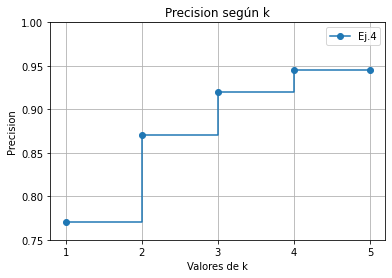

In [134]:
k = 5
n = 200 #n imagenes de test
graf_precisiones(test,Ui,n,k)

# Ejercicio 5

### Finalmente comparar los resultados obtenidos para la precisión entre los ejercicios 2 y 4. ¿Qué puede observar? Graficar y comentar aquellos casos en los cuales la predicción falló en el ejercicio 4 para distintos $k$. Por ejemplo, algún caso en el que la predicción haya fallado con algún $k$ y luego con otro $k$ haya sido exitosa.

Precision en ej.2:  0.83
Precision para k=1: 0.770 para 200 imagenes de test
Precision para k=2: 0.870 para 200 imagenes de test
Precision para k=3: 0.920 para 200 imagenes de test
Precision para k=4: 0.945 para 200 imagenes de test
Precision para k=5: 0.945 para 200 imagenes de test


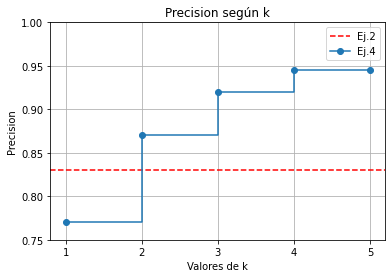

In [205]:
#Precision del ej.2:
pred_con_prom = precision(test,imagenes_prom)
print("Precision en ej.2: ", pred_con_prom)
plt.axhline(y=pred_con_prom, color='red', linestyle='--', label='Ej.2')
#Precision del ej.4:
graf_precisiones(test,Ui,n,k)

Encontre que en todo k acierta en fila: 3105
Prediccion con imagenes promedio:  2
Predicciones:  [2, 2, 2, 2, 2, 2, 2]

Encontre que en todo k falla en fila: 1198
Prediccion con imagenes promedio:  4
Predicciones:  [4, 4, 4, 4, 9, 9, 5]

Encontre que algun k acierta y en otro falla en fila: 3012
Prediccion con imagenes promedio:  8
Predicciones:  [8, 9, 9, 8, 8, 8, 8]



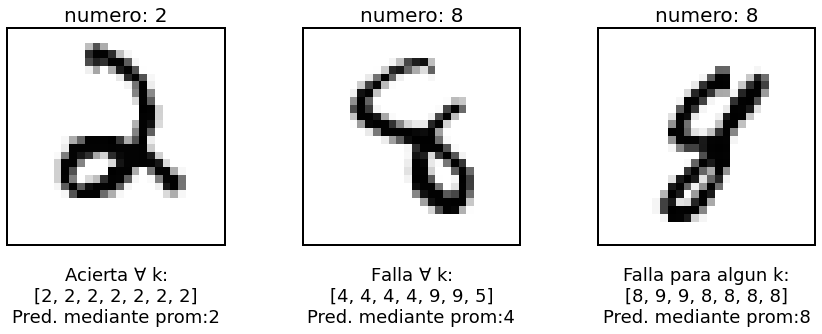

In [138]:
def prediccion_hasta_k(df_test,Ui,k,x):
    predicciones = []
    for i in range(1,k+1):
        pred = prediccion_SVD(Ui,i,x)
        predicciones.append(pred)
    return predicciones

def aux(df,fila):
    img = np.array(df.iloc[fila,1:]).reshape(28,28)
    label = df.iloc[fila,0]
    plt.imshow(img,cmap='Greys')
    plt.title(f'numero: {label}',fontsize=20)
    configuraciones_diseño()

def graficar_fallos(df_test,Ui,k,n):
    df = df_test.iloc[:n,test.columns[1:]].values
    todo_k_acierta = False
    todo_k_falla = False
    algun_k_falla = False
    #Agarro 3 imagenes para los 3 casos posibles: 
    # *predice bien para todo k
    # *predice mal para todo k
    # *predice mal para los primeros k, pero luego acierta
    while (not todo_k_acierta) or (not todo_k_falla) or (not algun_k_falla):
        fila = np.random.randint(0, n-1)
        x = df[fila]
        label = df_test.iloc[fila,0]
        predicciones = prediccion_hasta_k(df_test,Ui,k,x)
        coincidencias = [pred == label for pred in predicciones]
        not_coincidencias = [not pred for pred in coincidencias]
        if all(coincidencias) and (not todo_k_acierta): #todos true
            todo_k_acierta = True
            pred_prom = prediccion(imagenes_prom,df[fila])
            k_acierta = (predicciones,fila,pred_prom)
            print("Encontre que en todo k acierta en fila:",fila)
            print("Prediccion con imagenes promedio: ",pred_prom)
            print("Predicciones: ",predicciones)
            print()
        if (not any(coincidencias)) and (not todo_k_falla): #todos false
            todo_k_falla = True
            pred_prom = prediccion(imagenes_prom,df[fila])
            k_falla = (predicciones,fila,pred_prom)
            print("Encontre que en todo k falla en fila:",fila)
            print("Prediccion con imagenes promedio: ",pred_prom)
            print("Predicciones: ",predicciones)
            print()
        if (any(coincidencias) and (any(not_coincidencias))) and (not algun_k_falla):
            algun_k_falla = True
            pred_prom = prediccion(imagenes_prom,df[fila])
            algun_k = (predicciones,fila,pred_prom)
            print("Encontre que algun k acierta y en otro falla en fila:",fila)
            print("Prediccion con imagenes promedio: ",pred_prom)
            print("Predicciones: ",predicciones)
            print()
            
    
            
    imgs = [k_acierta,k_falla,algun_k]
    msgs = [r"Acierta $\forall$ k",r"Falla $\forall$ k","Falla para algun k"]
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))

    for i in range(0,3):
        img = imgs[i] 
        plt.subplot(1,3,i+1)
        
        axs[i].text(0.5, -0.1, f'{msgs[i]}:\n{img[0]}\nPred. mediante prom:{img[2]}', transform=axs[i].transAxes, ha='center',va="top",fontsize=18)
        aux(df_test,img[1])
    plt.show()
        
k=7
n = 5000 #primeras n imgs de test
graficar_fallos(test,Ui,k,n)

**Conclusiones**:

La precision usando SVD aumentó al agregar columnas de U, lo cual tiene sentido ya que al agregar columnas se agrega informacion importante sobre las imagenes. 

Si bien el promedio le ganó en precision a SVD usando solo la primer columna (0.83 de promedio contra 0.77 de SVD), al agregar una mas, SVD obtuvo mayor precisión. Al utilizar la descomposición SVD, se observó una mejora en la precisión a medida que aumentaba el valor de k, alcanzando una precisión de 0.945 para k=4 y k=5. 

Esto sugiere que la descomposición SVD, al considerar más columnas de la matriz U, capturó mejor las características principales de las imágenes y mejoró la capacidad de predicción. 

Sin embargo, al analizar el gráfico de precisiones, se puede observar que a medida que se añaden columnas adicionales, la curva tiende a estabilizarse o mostrar una menor variación en sus valores. Esta tendencia puede indicar que el modelo alcanza un punto de saturación o que el beneficio de agregar más columnas disminuye significativamente en términos de mejora en la precisión del modelo.

Utilizar la descomposición SVD con un número adecuado de componentes puede ser beneficioso para mejorar la precisión y la eficacia en la predicción de las imágenes.